<a href="https://colab.research.google.com/github/Muhammad-Haris-coding/1st-code/blob/main/EdaOnNetflexDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **finding the shape of the dataset**

In [137]:
df.shape

(8807, 12)

### **Finding the datatype**

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### **Finding the missing values**

In [139]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


How the data look mathimatically

In [140]:
df.describe( )

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### **Are there any duplicated values**

In [141]:
df.duplicated().sum()

np.int64(0)

In [142]:
df.sample(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5397,s5398,TV Show,Learning Songs by Little Baby Bum: Nursery Rhy...,NaN,"Chloe Marsden, Aaron Marsden, María Esnoz",United Kingdom,"July 1, 2017",2015,TV-Y,1 Season,"British TV Shows, Kids' TV",Simple songs mix with colorful animation to te...
5444,s5445,TV Show,Crashing,NaN,"Phoebe Waller-Bridge, Jonathan Bailey, Adrian ...",United Kingdom,"June 2, 2017",2016,TV-MA,1 Season,"British TV Shows, International TV Shows, Roma...","In exchange for low rent, a hodgepodge group o..."
779,s780,Movie,Battlefield Earth,Roger Christian,"John Travolta, Barry Pepper, Forest Whitaker, ...",United States,"June 2, 2021",2000,PG-13,118 min,"Action & Adventure, Cult Movies, Sci-Fi & Fantasy","In the year 3000, an alien race known as the P..."
4261,s4262,TV Show,Way Back into Love,NaN,"June Tsai, Ray Chang, Lung Shao-hua, Yi-Wen Ye...",Taiwan,"December 24, 2018",2011,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","After years in the U.S., a Taiwanese immigrant..."
5415,s5416,Movie,Okja,Bong Joon Ho,"Tilda Swinton, Jake Gyllenhaal, An Seo Hyun, P...","South Korea, United States","June 28, 2017",2017,TV-MA,121 min,"Action & Adventure, Comedies, Dramas",A gentle giant and the girl who raised her are...


### **Cleaning the data**

filling the NAN value of the Directer column by 'Unknown'

In [143]:
df['director']=df['director'].fillna('unknown')
df['director'].isna().sum()


np.int64(0)

filling the cast  column NAN by Unknown

In [144]:
df['cast']=df['cast'].fillna('unknown')
df['cast'].isna().sum()

np.int64(0)

filling the country column also with the Unknown

In [145]:
df['country']=df['country'].fillna('unknown')
df['country'].isna().sum()

np.int64(0)

filling the column date added by unknown

In [146]:
df['date_added']=df['date_added'].fillna('unknown')
df['date_added'].isna().sum()

np.int64(0)

Droping the NAN rows of the rating and duration column because they are 4, 3 in number

In [147]:
df=df.dropna(subset=['rating'])
df=df.dropna(subset=['duration'])

In [148]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


Converting the date added column to date_time type

In [149]:
df['date_added']=pd.to_datetime(df['date_added'] ,format='%B %d, %Y', errors='coerce')

df['release_year']=pd.to_datetime(df['release_year'] , format='%Y' , errors='coerce')

### **univariate analysis**

In [150]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **catagorical columns**

countplot for the Type base

<Axes: xlabel='type', ylabel='count'>

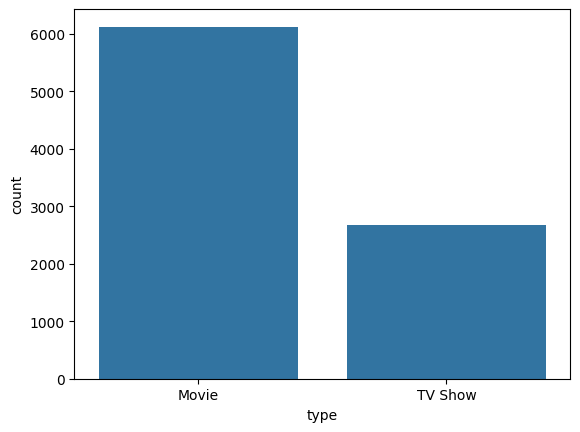

In [151]:
sns.countplot(x=df['type'])


pieplot for the Type column

<Axes: ylabel='count'>

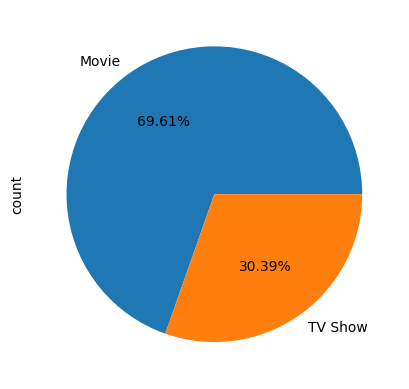

In [152]:
countvalues=df['type'].value_counts()
countvalues.plot(kind='pie',autopct='%0.2f%%')

Now for the Rating column

<Axes: xlabel='rating', ylabel='count'>

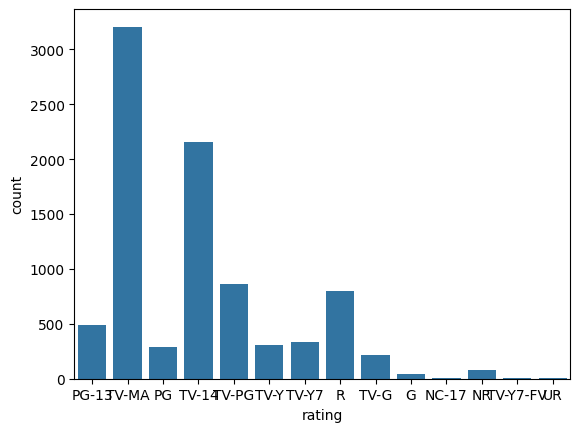

In [153]:
sns.countplot(x=df['rating'])

In [154]:
UR_count=df[df['rating']=='UR'].shape[0]
UR_count


3

now for the pie chart

<Axes: ylabel='count'>

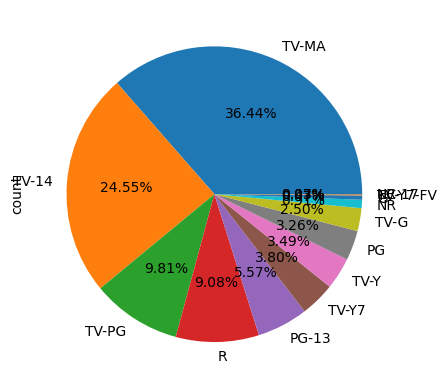

In [155]:
df['rating'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [156]:
rating_count=df['rating'].value_counts()
rating_count

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


## **numerical columns**

In [157]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [158]:
directer_count=df['director'].value_counts()
directer_count[1:].value_counts().sum()

np.int64(4526)

<Axes: xlabel='count'>

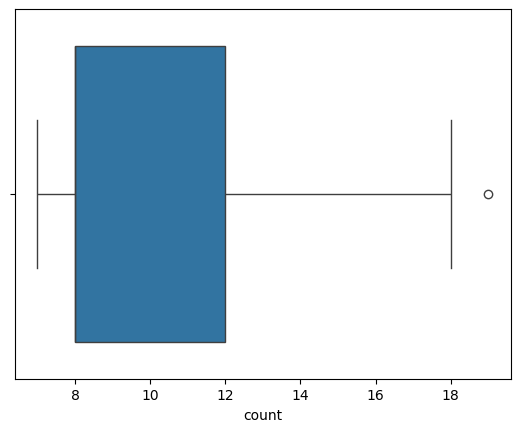

In [159]:
sns.boxplot(x=directer_count[1:-4500])

<Axes: xlabel='count', ylabel='Count'>

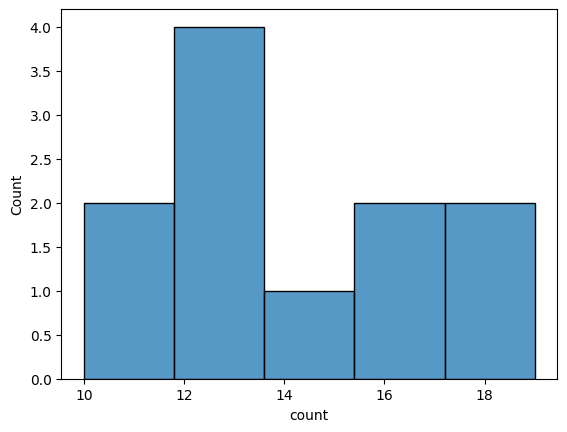

In [160]:
sns.histplot(x=directer_count[1:12])

histogram of the released year based

In [161]:
df['release_year'].value_counts()

,count
release_year,
2018-01-01,1147
2017-01-01,1030
2019-01-01,1030
2020-01-01,953
2016-01-01,902
...,...
1961-01-01,1
1925-01-01,1
1959-01-01,1


<Axes: ylabel='Frequency'>

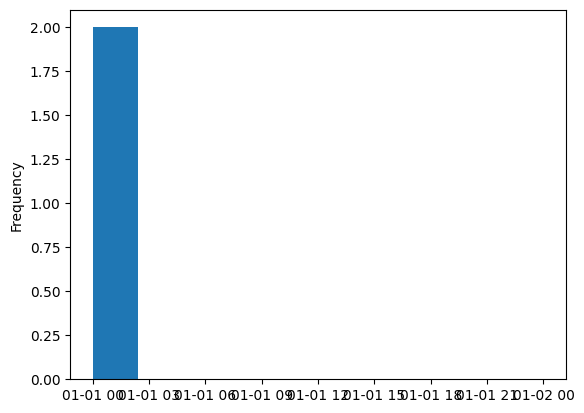

In [162]:
df['release_year'].plot(kind='hist')

<Axes: xlabel='release_year'>

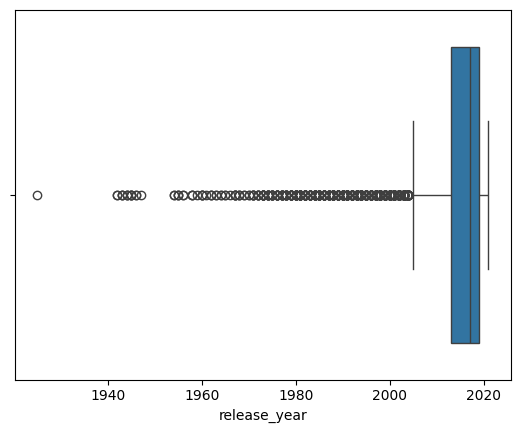

In [163]:
sns.boxplot(x=df['release_year'])

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8800 non-null   object        
 1   type          8800 non-null   object        
 2   title         8800 non-null   object        
 3   director      8800 non-null   object        
 4   cast          8800 non-null   object        
 5   country       8800 non-null   object        
 6   date_added    8702 non-null   datetime64[ns]
 7   release_year  8800 non-null   datetime64[ns]
 8   rating        8800 non-null   object        
 9   duration      8800 non-null   object        
 10  listed_in     8800 non-null   object        
 11  description   8800 non-null   object        
dtypes: datetime64[ns](2), object(10)
memory usage: 893.8+ KB


creating  the month , day and year column from the date_added column

In [166]:
df['month_released']=df['date_added'].dt.month


In [169]:
df['days_released']=df['date_added'].dt.day

In [170]:
df['year_released']=df['date_added'].dt.year

In [171]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_released,days_released,year_released
8019,s8020,Movie,Silicon Cowboys,Jason Cohen,unknown,United States,2017-04-01,2016-01-01,TV-PG,77 min,Documentaries,This documentary tells the story of Compaq Com...,4.0,1.0,2017.0
2015,s2016,Movie,Aapla Manus,Satish Rajwade,"Nana Patekar, Sumeet Raghvan, Iravati Harshe, ...",India,2020-09-10,2018-01-01,TV-14,133 min,"Dramas, International Movies, Thrillers","When a man falls from his balcony, an investig...",9.0,10.0,2020.0
1154,s1155,Movie,Lawless,John Hillcoat,"Shia LaBeouf, Jessica Chastain, Jason Clarke, ...",United States,2021-03-28,2012-01-01,R,116 min,Dramas,This true-to-life action saga profiles Virgini...,3.0,28.0,2021.0
6202,s6203,Movie,Azhar,Anthony D'Souza,"Emraan Hashmi, Prachi Desai, Nargis Fakhri, La...",India,2019-04-12,2016-01-01,TV-14,129 min,"Dramas, International Movies, Sports Movies",This biopic traces the tumultuous life and car...,4.0,12.0,2019.0
6728,s6729,TV Show,Ezel,unknown,"Kenan İmirzalıoğlu, Cansu Dere, Haluk Bilginer...",Turkey,2016-12-26,2009-01-01,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A young man framed for a crime escapes a priso...,12.0,26.0,2016.0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8800 non-null   object        
 1   type            8800 non-null   object        
 2   title           8800 non-null   object        
 3   director        8800 non-null   object        
 4   cast            8800 non-null   object        
 5   country         8800 non-null   object        
 6   date_added      8702 non-null   datetime64[ns]
 7   release_year    8800 non-null   datetime64[ns]
 8   rating          8800 non-null   object        
 9   duration        8800 non-null   object        
 10  listed_in       8800 non-null   object        
 11  description     8800 non-null   object        
 12  month_released  8702 non-null   float64       
 13  days_released   8702 non-null   float64       
 14  year_released   8702 non-null   float64       
dtypes: dateti

### **Bivariate analysis**

In [173]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_released,days_released,year_released
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25.0,2021.0
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,24.0,2021.0
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24.0,2021.0


catagorical vs vatagorical

In [175]:
pd.crosstab(df['month_released'],df['type'])

type,Movie,TV Show
month_released,,
1.0,545,181
2.0,382,174
3.0,528,205
4.0,549,209
5.0,439,187
6.0,492,232
7.0,565,254
8.0,518,230
9.0,518,246


<Axes: xlabel='type', ylabel='month_released'>

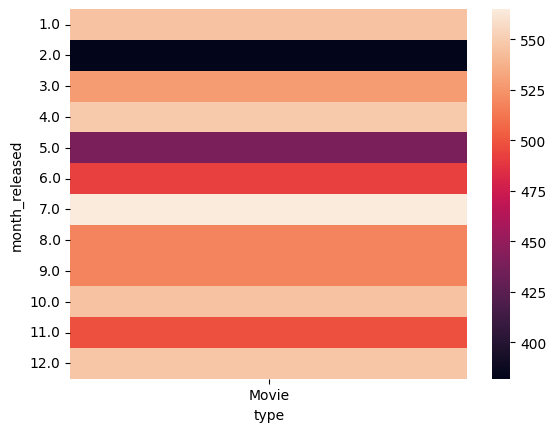

In [178]:
movie_df = df[df['type'] == 'Movie']
sns.heatmap(pd.crosstab(movie_df['month_released'], movie_df['type']))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_released,days_released,year_released
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25.0,2021.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",unknown,2021-09-24,2021-01-01,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9.0,24.0,2021.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9.0,24.0,2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021-01-01,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9.0,24.0,2021.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021-01-01,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,9.0,23.0,2021.0


<Axes: xlabel='type', ylabel='year_released'>

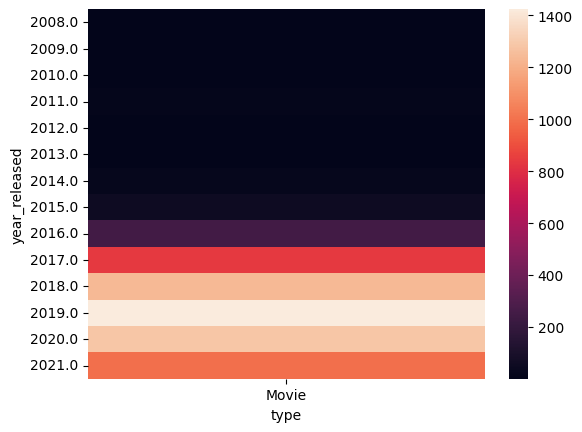

In [181]:
sns.heatmap(pd.crosstab(df['year_released'],movie_df['type']))

<Axes: xlabel='type', ylabel='country'>

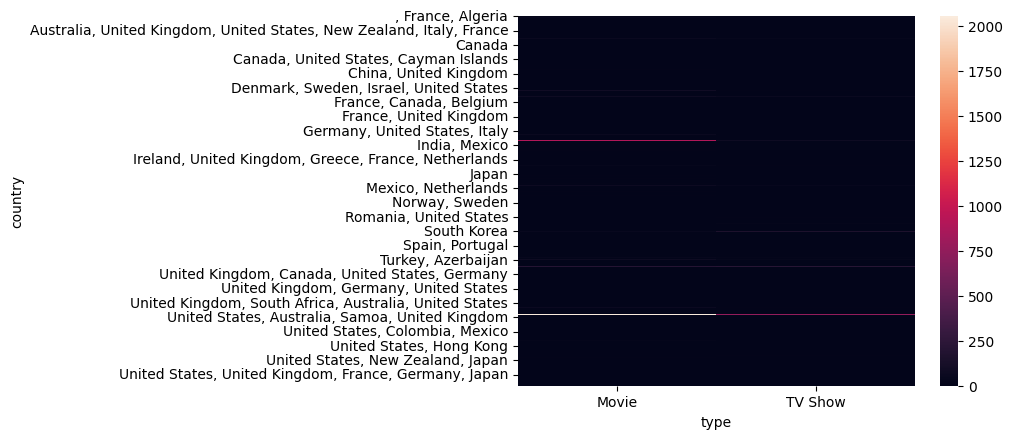

In [186]:
known_country=df[df['country']!='unknown']
sns.heatmap(pd.crosstab(known_country['country'],known_country['type']))

numrical vs catagorical

In [217]:
country_count=known_country['country'].value_counts()
country_tokeep=country_count[country_count>100].index
country_tokeep=known_country[known_country['country'].isin(country_tokeep)]
country_tokeep['country']

,country
0,United States
4,India
8,United Kingdom
9,United States
15,United States
...,...
8799,India
8802,United States
8804,United States
8805,United States


In [218]:
pd.crosstab(country_tokeep['country'],country_tokeep['type'])

type,Movie,TV Show
country,,
Canada,122,59
Egypt,92,14
France,75,49
India,893,79
Japan,76,168
Mexico,70,40
South Korea,41,158
Spain,97,48
Turkey,76,29


<Axes: xlabel='type', ylabel='country'>

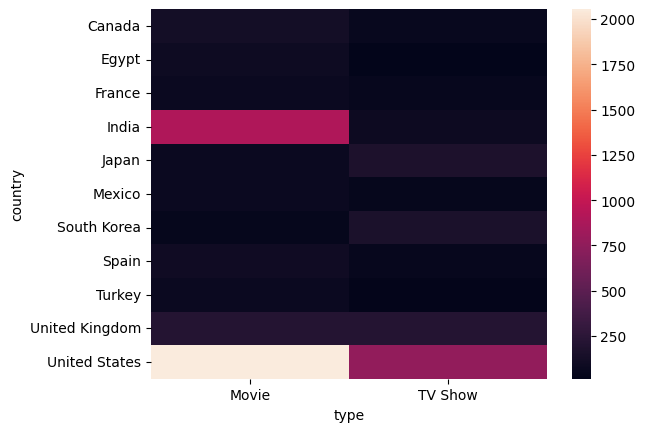

In [219]:

sns.heatmap(pd.crosstab(country_tokeep['country'],country_tokeep['type']))

In [244]:
df['duration'].value_counts()

,count
duration,
1 Season,1791
2 Seasons,425
3 Seasons,199
90 min,152
97 min,146
...,...
228 min,1
18 min,1
205 min,1


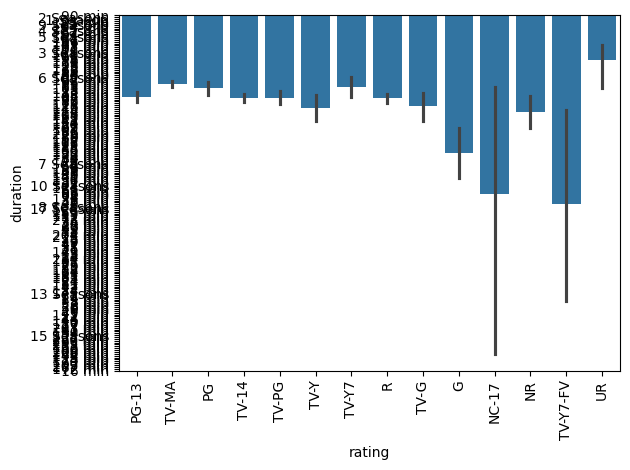

In [248]:
sns.barplot( y=df['duration'],x=df['rating'])
plt.xticks(rotation=90)
plt.tight_layout()

which directer had done more movies

In [237]:
only_movies=df[df['type']=='Movie']
known_directer=only_movies[only_movies['director']!='unknown']

directer_count=known_directer['director'].value_counts()
# Get the top 10 directors by movie count
top_directors = directer_count.head(10)
directer_count.head(10)

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
Jay Chapman,12
Martin Scorsese,12


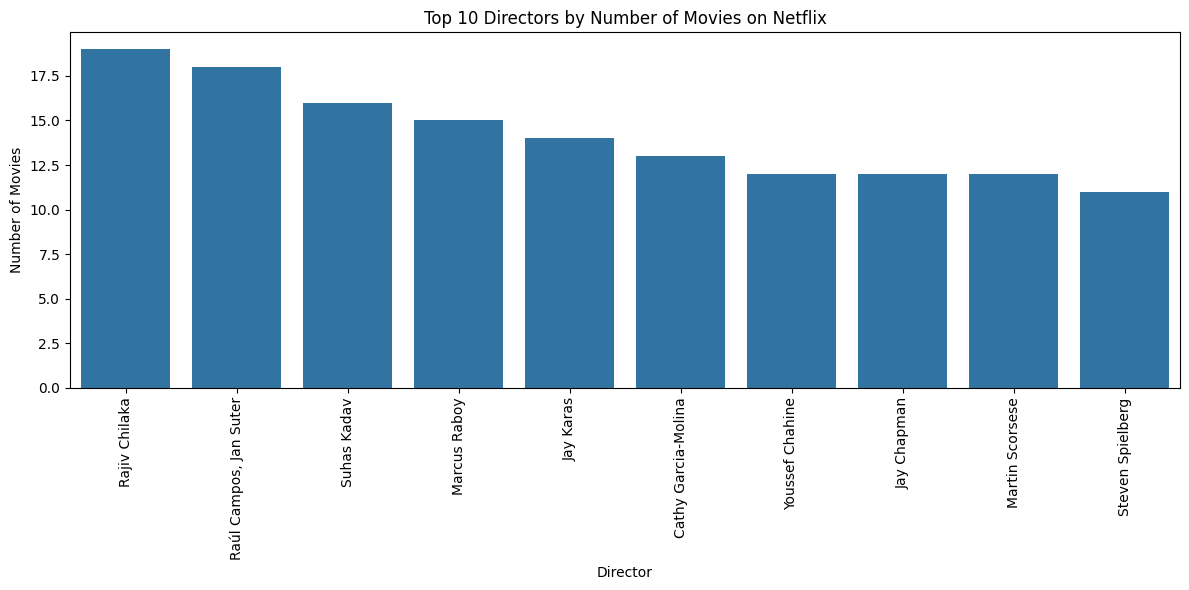

In [242]:
# Create a bar plot using the top_directors Series
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xticks(rotation=90)
plt.title('Top 10 Directors by Number of Movies on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()